In [1]:
from tg.grammar_ru import Loc

corpora = [
    Loc.corpus_path/'books.base.zip',
    Loc.corpus_path/'pub.base.zip',
    #Loc.corpus_path/'lenta.base.zip',
]

In [2]:
from tg.projects.alternative import WordSequenceFilterer, WordPairsNegativeSampler

ne_filter = WordSequenceFilterer([['не'], ['ни']])

ne_sampler = WordPairsNegativeSampler([('не', 'ни'), ('Не', 'Ни')])

In [3]:
from tg.grammar_ru.corpus import BucketBalancer, CorpusReader
from pathlib import Path
from yo_fluq_ds import *

buckets_path = Path('files/ne-buckets.parquet')
if not buckets_path.is_file():
    en = CorpusReader.read_frames_from_several_corpora(corpora).feed(fluq.with_progress_bar()).select(ne_filter.filter)
    buckets_df = BucketBalancer.collect_buckets(en)
    buckets_df.to_parquet(buckets_path)
else:
    buckets_df = pd.read_parquet(buckets_path)

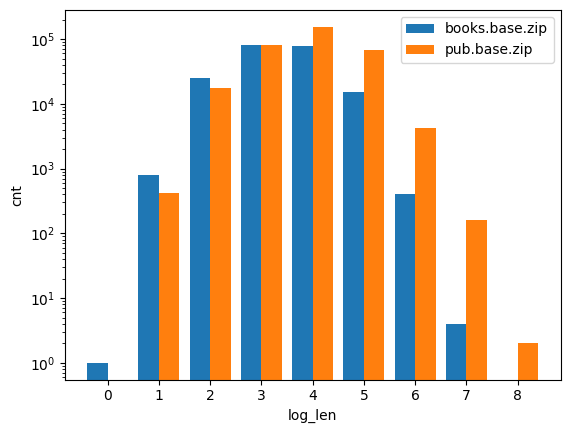

In [4]:
from tg.common.analysis import grbar_plot

ax = grbar_plot(
    buckets_df.groupby(['corpus_id','log_len']).size().to_frame('cnt').reset_index(),
    value_column='cnt',
    color_column='corpus_id',
    group_column='log_len'
)
ax.set_yscale('log')
ax.legend()

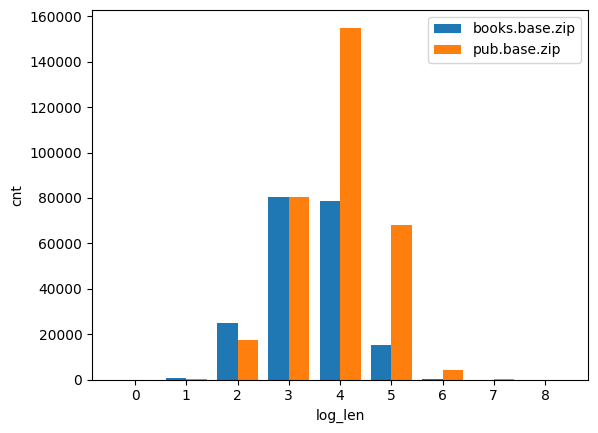

In [5]:
import numpy as np
take_df = buckets_df
take_df['random'] = np.random.rand(take_df.shape[0])
take_df = take_df.feed(fluq.add_ordering_column(['corpus_id','log_len'],'random'))
#take_df = take_df.loc[take_df.order<5000]


ax = grbar_plot(
    take_df.groupby(['corpus_id','log_len']).size().to_frame('cnt').reset_index(),
    value_column='cnt',
    color_column='corpus_id',
    group_column='log_len'
)
ax.legend()


In [6]:
ne_balancer = BucketBalancer(BucketBalancer.buckets_statistics_to_dict(take_df))
str(ne_balancer.buckets)[:100]

"{'books.base.zip': {0, 26214401, 30932994, 26214404, 26214405, 26214406, 30933000, 16252939, 3093300"

In [9]:
from tg.projects.alternative import AlternativeTaskTransfuseSelector
from tg.grammar_ru.corpus import CorpusBuilder
from tg.common import Logger

#Logger.disable()


selector = AlternativeTaskTransfuseSelector(
    ne_balancer,
    ne_filter,
    ne_sampler
)

ne_transfused = Loc.temp_path/'demos/bundle/ne.transfused.zip'

CorpusBuilder.transfuse_corpus(
    sources = corpora,
    destination = ne_transfused,
    selector = selector,
    words_per_frame = 3000,
    words_limit = 200000,
    overwrite = True
)

2024-01-09 20:54:53.384132 INFO: Processed 31 words. 1/69416
2024-01-09 20:54:53.388926 INFO: Processed 62 words. 1/69416
2024-01-09 20:54:53.496454 INFO: Processed 2039 words. 2/69416
2024-01-09 20:54:53.504316 INFO: Writing 4 frames, 4016 words, to write 2981, to keep 1035
2024-01-09 20:54:53.510843 INFO: Processed 4016 words. 2/69416
2024-01-09 20:54:53.516356 INFO: Processed 4556 words. 2/69416
2024-01-09 20:54:53.520843 INFO: Processed 4638 words. 2/69416
2024-01-09 20:54:53.525976 INFO: Processed 4701 words. 2/69416
2024-01-09 20:54:53.531374 INFO: Processed 4764 words. 2/69416
2024-01-09 20:54:53.635720 INFO: Writing 6 frames, 3387 words, to write 2991, to keep 396
2024-01-09 20:54:53.642146 INFO: Processed 6368 words. 3/69416
2024-01-09 20:54:53.647615 INFO: Processed 7972 words. 3/69416
2024-01-09 20:54:53.652041 INFO: Processed 8331 words. 3/69416
2024-01-09 20:54:53.656738 INFO: Processed 8363 words. 3/69416
2024-01-09 20:54:53.661167 INFO: Processed 8395 words. 3/69416
2024

In [10]:
from tg.grammar_ru import CorpusReader

CorpusReader(ne_transfused).get_toc()

,filename,timestamp,part_index,token_count,character_count,ordinal,max_id
file_id,,,,,,,
789c5f1b-2122-497a-83f4-eb235d8d05f3,,2024-01-09 20:54:53,0,2981,14375,0,3015
78bb8740-e2a2-4f9e-8671-27c3c013ddf2,,2024-01-09 20:54:53,1,2991,14158,1,6061
c5ca9026-16a9-4320-8062-abc62721e015,,2024-01-09 20:54:53,2,2984,14306,2,9100
158a8e40-9cf0-4db4-bfc1-fbf9ec479beb,,2024-01-09 20:54:53,3,2996,14302,3,12118
bd619157-a181-4f3b-8b3b-1688dae3f03d,,2024-01-09 20:54:53,4,2977,12903,4,15139
...,...,...,...,...,...,...,...
54a045c6-1947-47ff-8faa-11a4f5e73451,,2024-01-09 20:54:59,63,2983,12377,63,193414
bda414ba-30cd-4908-abfa-823fd358a62e,,2024-01-09 20:54:59,64,2976,14736,64,196412
672d544c-7a18-4e22-8ee5-2ff8051198e4,,2024-01-09 20:54:59,65,2981,14007,65,199426


In [11]:
CorpusReader(ne_transfused).get_frames().first().head()

,word_id,sentence_id,word_index,paragraph_id,word_tail,word,word_type,word_length,file_id,corpus_id,is_target,label,original_corpus,original_word_id,original_sentence_id,original_paragraph_id,updated
0,0,0,0,0,1,Семь,ru,4,789c5f1b-2122-497a-83f4-eb235d8d05f3,ne.transfused.zip,False,0,books.base.zip,0,0,0,False
1,1,0,1,0,1,книг,ru,4,789c5f1b-2122-497a-83f4-eb235d8d05f3,ne.transfused.zip,False,0,books.base.zip,1,0,0,False
2,2,0,2,0,1,о,ru,1,789c5f1b-2122-497a-83f4-eb235d8d05f3,ne.transfused.zip,False,0,books.base.zip,2,0,0,False
3,3,0,3,0,1,приключениях,ru,12,789c5f1b-2122-497a-83f4-eb235d8d05f3,ne.transfused.zip,False,0,books.base.zip,3,0,0,False
4,4,0,4,0,1,Гарри,ru,5,789c5f1b-2122-497a-83f4-eb235d8d05f3,ne.transfused.zip,False,0,books.base.zip,4,0,0,False


In [10]:
from tg.grammar_ru.features import PyMorphyFeaturizer, SlovnetFeaturizer, SnowballFeaturizer

ne_featurized = Loc.temp_path/'demos/bundle/ ne.featurized.zip'

CorpusBuilder.featurize_corpus(
    ne_transfused,
    ne_featurized,
    [SnowballFeaturizer()]
)

In [11]:
ne_bundle = Loc.temp_path/'demos/bundle/ne_bundle'
CorpusBuilder.assemble(
    ne_featurized,
    ne_bundle
)

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [12]:
from tg.common.ml.batched_training import train_display_test_split

index_frame = pd.read_parquet(ne_bundle/'src.parquet')
index_frame = index_frame.loc[index_frame.is_target][['word_id','sentence_id','label']].reset_index(drop=True)
index_frame.index.name = 'sample_id'
index_frame['split'] = train_display_test_split(index_frame)
index_frame.to_parquet(ne_bundle/'index.parquet')
index_frame.head()

,word_id,sentence_id,label,split
sample_id,,,,
0,1,0,0,train
1,34,1,0,test
2,58,2,0,display
3,61,3,0,train
4,88,3,0,display


In [13]:
from tg.common import DataBundle

db = DataBundle.load(ne_bundle)
print('ok')

ok


In [14]:
CorpusReader(ne_bundle)